<a href="https://colab.research.google.com/github/Tasfia48/vis_rep_prog_comprehension_project_795/blob/main/CS_795_Final_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Data

In [11]:
!gdown https://drive.google.com/uc?id=1Cn_hwxJlo1R8I0IDGQcNzPUYtyD6T9a2 #FULL DATASET

Downloading...
From: https://drive.google.com/uc?id=1Cn_hwxJlo1R8I0IDGQcNzPUYtyD6T9a2
To: /content/Readability_Dataset_Complete.zip
100% 61.1M/61.1M [00:00<00:00, 87.8MB/s]


In [12]:
!unzip 'Readability_Dataset_Complete.zip' &>/dev/null

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
!mkdir 'weights'

### Link to get the pretained weights: https://drive.google.com/file/d/19_oDjjrU2fYulxZVxOp_VWndohN-sfOy/view?usp=sharing


In [5]:
!cp -r '/content/drive/MyDrive/SWE 795/pretrained_weights_converted.h5' '/content/weights/' 

### Import Libraries

In [6]:

import glob
import pandas as pd
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from tensorflow import keras


import PIL
import os
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
#from sklearn import svm

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import datasets, layers, models



from matplotlib import pyplot as plt
from PIL import Image                                                            
import glob
import cv2
from PIL import Image
import numpy as np

from pathlib import Path

from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.callbacks import ReduceLROnPlateau

from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout, MaxPooling2D, Flatten


from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2M, EfficientNetV2B2, EfficientNetV2B0

In [7]:
!pip install tensorflow_addons
import tensorflow_addons as tfa
from tensorflow_addons.optimizers import AdamW

     |████████████████████████████████| 1.1 MB 9.0 MB/s 


## Pre-processing Dataset - JAVA

In [13]:
nsh_dark_java = pd.read_csv('MergedTotal_NSH_Dark/csv/merged_java.csv')
nsh_light_java = pd.read_csv('MergedTotal_NSH_Light/csv/merged_java.csv')
sh_light_java = pd.read_csv('MergedTotal_SH_Light/csv/merged_java.csv')
sh_dark_java = pd.read_csv('MergedTotal_SH_Dark/csv/merged_java.csv')

nsh_dark_java['filepaths'] = "MergedTotal_NSH_Dark/" + nsh_dark_java['filepaths']
nsh_light_java['filepaths'] = "MergedTotal_NSH_Light/" + nsh_light_java['filepaths']
sh_light_java['filepaths'] = "MergedTotal_SH_Light/" + sh_light_java['filepaths']
sh_dark_java['filepaths'] = "MergedTotal_SH_Dark/" + sh_dark_java['filepaths']

train_nsh_dark, val_nsh_dark, test_nsh_dark = \
              np.split(nsh_dark_java.sample(frac=1, random_state=42), 
                       [int(.8*len(nsh_dark_java)), int(.9*len(nsh_dark_java))])
              
train_sh_dark, val_sh_dark, test_sh_dark = \
              np.split(sh_dark_java.sample(frac=1, random_state=42), 
                       [int(.8*len(sh_dark_java)), int(.9*len(sh_dark_java))])

train_nsh_light, val_nsh_light, test_nsh_light = \
              np.split(nsh_light_java.sample(frac=1, random_state=42), 
                       [int(.8*len(nsh_light_java)), int(.9*len(nsh_light_java))])
              

              
train_sh_light, val_sh_light, test_sh_light = \
              np.split(sh_light_java.sample(frac=1, random_state=42), 
                       [int(.8*len(sh_light_java)), int(.9*len(sh_light_java))])
              
train_df_java = pd.concat([train_nsh_dark,train_sh_dark,train_nsh_light,train_sh_light], ignore_index=True)
val_df_java = pd.concat([val_nsh_dark,val_sh_dark,val_nsh_light,val_sh_light], ignore_index=True)
test_df_java = pd.concat([test_nsh_dark,test_sh_dark,test_nsh_light,test_sh_light], ignore_index=True)

train_nsh_dark.readable = np.where(train_nsh_dark.average_score >= 3.5, 1, 0)
val_nsh_dark.readable = np.where(val_nsh_dark.average_score >= 3.5, 1, 0)
test_nsh_dark.readable = np.where(test_nsh_dark.average_score >= 3.5, 1, 0)

train_sh_dark.readable = np.where(train_sh_dark.average_score >= 3.5, 1, 0)
val_sh_dark.readable = np.where(val_sh_dark.average_score >= 3.5, 1, 0)
test_sh_dark.readable = np.where(test_sh_dark.average_score >= 3.5, 1, 0)

train_sh_light.readable = np.where(train_sh_light.average_score >= 3.5, 1, 0)
val_sh_light.readable = np.where(val_sh_light.average_score >= 3.5, 1, 0)
test_sh_light.readable = np.where(test_sh_light.average_score >= 3.5, 1, 0)

train_nsh_light.readable = np.where(train_nsh_light.average_score >= 3.5, 1, 0)
val_nsh_light.readable = np.where(val_nsh_light.average_score >= 3.5, 1, 0)
test_nsh_light.readable = np.where(test_nsh_light.average_score >= 3.5, 1, 0)

train_df_java.readable = np.where(train_df_java.average_score >= 3.5, 1, 0)
val_df_java.readable = np.where(val_df_java.average_score >= 3.5, 1, 0)
test_df_java.readable = np.where(test_df_java.average_score >= 3.5, 1, 0)

#### Readability Threshold = 3

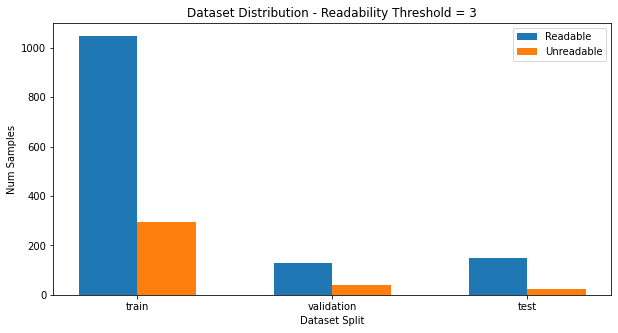

In [14]:
train_df_java.readable = np.where(train_df_java.average_score >= 3, 1, 0)
val_df_java.readable = np.where(val_df_java.average_score >= 3, 1, 0)
test_df_java.readable = np.where(test_df_java.average_score >= 3, 1, 0)

positive_labels = (train_df_java.readable.value_counts().to_list()[0], val_df_java.readable.value_counts().to_list()[0], test_df_java.readable.value_counts().to_list()[0])
negative_labels = (train_df_java.readable.value_counts().to_list()[1], val_df_java.readable.value_counts().to_list()[1], test_df_java.readable.value_counts().to_list()[1])
# Numbers of pairs of bars you want
N = 3


# Data on X-axis

# Specify the values of blue bars (height)
blue_bar = positive_labels
# Specify the values of orange bars (height)
orange_bar = negative_labels

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='Readable')
plt.bar(ind + width, orange_bar, width, label='Unreadable')

plt.xlabel('Dataset Split')
plt.ylabel('Num Samples')
plt.title('Dataset Distribution - Readability Threshold = 3')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ("train", "validation", "test"))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

#### Readability Threshold = 3.5

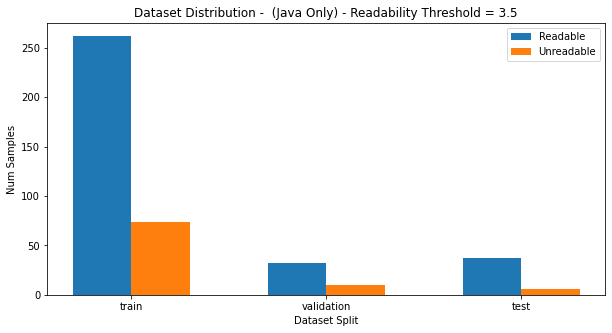

In [15]:
train_df_java.readable = np.where(train_df_java.average_score >= 3.5, 1, 0)
val_df_java.readable = np.where(val_df_java.average_score >= 3.5, 1, 0)
test_df_java.readable = np.where(test_df_java.average_score >= 3.5, 1, 0)

#positive_labels = (train_df_java.readable.value_counts().to_list()[0], val_df_java.readable.value_counts().to_list()[0], test_df_java.readable.value_counts().to_list()[0])
#negative_labels = (train_df_java.readable.value_counts().to_list()[1], val_df_java.readable.value_counts().to_list()[1], test_df_java.readable.value_counts().to_list()[1])
positive_labels = (train_nsh_dark.readable.value_counts().to_list()[0], val_nsh_dark.readable.value_counts().to_list()[0], test_nsh_dark.readable.value_counts().to_list()[0])
negative_labels = (train_nsh_dark.readable.value_counts().to_list()[1], val_nsh_dark.readable.value_counts().to_list()[1], test_nsh_dark.readable.value_counts().to_list()[1])

# Numbers of pairs of bars you want
N = 3


# Data on X-axis

# Specify the values of blue bars (height)
blue_bar = positive_labels
# Specify the values of orange bars (height)
orange_bar = negative_labels

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='Readable')
plt.bar(ind + width, orange_bar, width, label='Unreadable')

plt.xlabel('Dataset Split')
plt.ylabel('Num Samples')
plt.title('Dataset Distribution -  (Java Only) - Readability Threshold = 3.5')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ("train", "validation", "test"))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

### Dataset Preprocessing  - Complete 

In [18]:
nsh_dark_total = pd.read_csv('MergedTotal_NSH_Dark/csv/merged_total.csv')
nsh_light_total = pd.read_csv('MergedTotal_NSH_Light/csv/merged_total.csv')
sh_light_total = pd.read_csv('MergedTotal_SH_Light/csv/merged_total.csv')
sh_dark_total = pd.read_csv('MergedTotal_SH_Dark/csv/merged_total.csv')

nsh_dark_total['filepaths'] = "MergedTotal_NSH_Dark/" + nsh_dark_total['filepaths']
nsh_light_total['filepaths'] = "MergedTotal_NSH_Light/" + nsh_light_total['filepaths']
sh_light_total['filepaths'] = "MergedTotal_SH_Light/" + sh_light_total['filepaths']
sh_dark_total['filepaths'] = "MergedTotal_SH_Dark/" + sh_dark_total['filepaths']

train_nsh_dark, val_nsh_dark, test_nsh_dark = \
              np.split(nsh_dark_total.sample(frac=1, random_state=42), 
                       [int(.8*len(nsh_dark_total)), int(.9*len(nsh_dark_total))])
              
train_sh_dark, val_sh_dark, test_sh_dark = \
              np.split(sh_dark_total.sample(frac=1, random_state=42), 
                       [int(.8*len(sh_dark_total)), int(.9*len(sh_dark_total))])

train_nsh_light, val_nsh_light, test_nsh_light = \
              np.split(nsh_light_total.sample(frac=1, random_state=42), 
                       [int(.8*len(nsh_light_total)), int(.9*len(nsh_light_total))])
              
train_sh_light, val_sh_light, test_sh_light = \
              np.split(sh_light_total.sample(frac=1, random_state=42), 
                       [int(.8*len(sh_light_total)), int(.9*len(sh_light_total))])
              
train_df = pd.concat([train_nsh_dark,train_sh_dark,train_nsh_light,train_sh_light], ignore_index=True)
val_df = pd.concat([val_nsh_dark,val_sh_dark,val_nsh_light,val_sh_light], ignore_index=True)
test_df = pd.concat([test_nsh_dark,test_sh_dark,test_nsh_light,test_sh_light], ignore_index=True)

train_nsh_dark.readable = np.where(train_nsh_dark.average_score >= 3.5, 1, 0)
val_nsh_dark.readable = np.where(val_nsh_dark.average_score >= 3.5, 1, 0)
test_nsh_dark.readable = np.where(test_nsh_dark.average_score >= 3.5, 1, 0)

train_sh_dark.readable = np.where(train_sh_dark.average_score >= 3.5, 1, 0)
val_sh_dark.readable = np.where(val_sh_dark.average_score >= 3.5, 1, 0)
test_sh_dark.readable = np.where(test_sh_dark.average_score >= 3.5, 1, 0)

train_sh_light.readable = np.where(train_sh_light.average_score >= 3.5, 1, 0)
val_sh_light.readable = np.where(val_sh_light.average_score >= 3.5, 1, 0)
test_sh_light.readable = np.where(test_sh_light.average_score >= 3.5, 1, 0)

train_nsh_light.readable = np.where(train_nsh_light.average_score >= 3.5, 1, 0)
val_nsh_light.readable = np.where(val_nsh_light.average_score >= 3.5, 1, 0)
test_nsh_light.readable = np.where(test_nsh_light.average_score >= 3.5, 1, 0)

#### Readability Threshold = 3

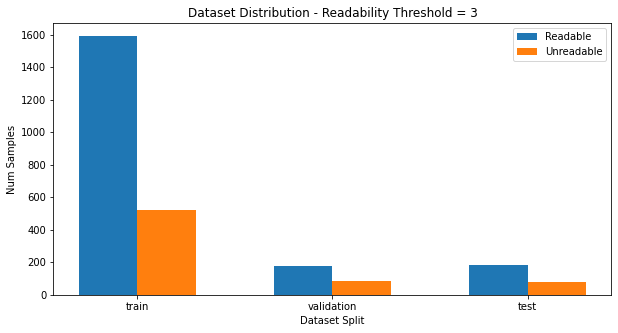

In [19]:
train_df.readable = np.where(train_df.average_score >= 3, 1, 0)
val_df.readable = np.where(val_df.average_score >= 3, 1, 0)
test_df.readable = np.where(test_df.average_score >= 3, 1, 0)

positive_labels = (train_df.readable.value_counts().to_list()[0], val_df.readable.value_counts().to_list()[0], test_df.readable.value_counts().to_list()[0])
negative_labels = (train_df.readable.value_counts().to_list()[1], val_df.readable.value_counts().to_list()[1], test_df.readable.value_counts().to_list()[1])
# Numbers of pairs of bars you want
N = 3


# Data on X-axis

# Specify the values of blue bars (height)
blue_bar = positive_labels
# Specify the values of orange bars (height)
orange_bar = negative_labels

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='Readable')
plt.bar(ind + width, orange_bar, width, label='Unreadable')

plt.xlabel('Dataset Split')
plt.ylabel('Num Samples')
plt.title('Dataset Distribution - Readability Threshold = 3')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ("train", "validation", "test"))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

#### Readability Threshold = 3.5

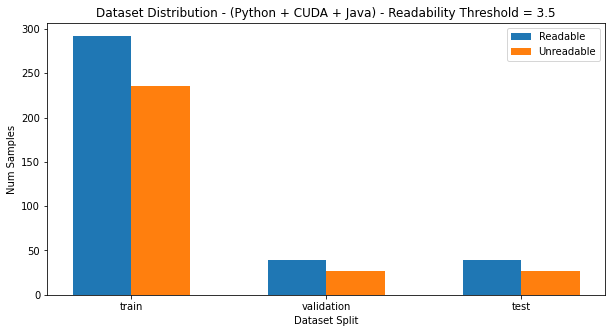

In [20]:
train_df.readable = np.where(train_df.average_score >= 3.5, 1, 0)
val_df.readable = np.where(val_df.average_score >= 3.5, 1, 0)
test_df.readable = np.where(test_df.average_score >= 3.5, 1, 0)

#positive_labels = (train_df.readable.value_counts().to_list()[0], val_df.readable.value_counts().to_list()[0], test_df.readable.value_counts().to_list()[0])
#negative_labels = (train_df.readable.value_counts().to_list()[1], val_df.readable.value_counts().to_list()[1], test_df.readable.value_counts().to_list()[1])
positive_labels = (train_nsh_dark.readable.value_counts().to_list()[0], val_nsh_dark.readable.value_counts().to_list()[0], test_nsh_dark.readable.value_counts().to_list()[0])
negative_labels = (train_nsh_dark.readable.value_counts().to_list()[1], val_nsh_dark.readable.value_counts().to_list()[1], test_nsh_dark.readable.value_counts().to_list()[1])


# Numbers of pairs of bars you want
N = 3


# Data on X-axis

# Specify the values of blue bars (height)
blue_bar = positive_labels
# Specify the values of orange bars (height)
orange_bar = negative_labels

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='Readable')
plt.bar(ind + width, orange_bar, width, label='Unreadable')

plt.xlabel('Dataset Split')
plt.ylabel('Num Samples')
plt.title('Dataset Distribution - (Python + CUDA + Java) - Readability Threshold = 3.5')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ("train", "validation", "test"))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

## Image Preprocessing and Dataset Creation

In [21]:
# generate training,testing and validation batches

#train_datagen = ImageDataGenerator(
#        rescale=1./255,
#        rotation_range=20,
#        width_shift_range=0.20,
#        height_shift_range=0.20,
#        zoom_range = 0.2,
#        horizontal_flip=True)

train_datagen = ImageDataGenerator(
        rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_dataframe(
dataframe=train_sh_dark,
#has_ext=Fals
x_col='filepaths',
y_col='readable',
batch_size=64,
seed=6,
shuffle=False,
#color_mode="rgb",
class_mode="raw",
#validate_filenames=True,
target_size=(224,224))


validation_generator=validation_datagen.flow_from_dataframe(
dataframe=val_sh_dark,
#has_ext=False,
x_col='filepaths',
y_col='readable',
batch_size=64,
seed=6,
shuffle=False,
#color_mode="rgb",
class_mode="raw",
#validate_filenames=True,
target_size=(224,224))

test_generator=test_datagen.flow_from_dataframe(
dataframe=test_df_java,
#has_ext=False,
x_col='filepaths',
y_col='readable',
batch_size=64,
seed=6,
shuffle=False,
#color_mode="rgb",
class_mode="raw",
#validate_filenames=True,
target_size=(224,224))

Found 527 validated image filenames.
Found 66 validated image filenames.
Found 172 validated image filenames.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 1 invalid image filename(s) in x_col="filepaths". These filename(s) will be ignored.
  .format(n_invalid, x_col)


## Building and Tuning All considered models (ResNet50, EfficientNet, VGG16)


#### ResNet50

In [22]:
model = ResNet50(
    include_top=True,
    weights="imagenet",
    #input_tensor=None,
    input_shape=(224,224,3)
)
new_input = model.input
hidden_layer = model.layers[-2].output

new_model = Model(inputs=new_input, outputs=hidden_layer)

x = new_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)

#x = Dense(2048, activation='relu')(x)
#x = Dense(1024, activation='relu')(x)
#x = Dense(512, activation='relu')(x)

preds = Dense(1, activation = 'sigmoid')(x)
model = Model(inputs=new_input, outputs=preds)
# model.summary()

102981632/102967424 [==============================] - 1s 0us/step


#### Custom Model



In [ ]:
img_width= 600
img_height= 600
#batch_size= 32

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

inp = Input(shape=(img_width, img_height, 3))
x = Conv2D(32, (3, 3), activation='relu')(inp)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)

out = Dense(1, activation='sigmoid')(x)
model = Model(inputs=inp, outputs=out)
model.summary()

#### EfficientNet_V2

In [ ]:
model = EfficientNetV2B2(
    include_top=False,
    weights="imagenet",
    #input_tensor=None,
    input_shape=(260,260,3),
    include_preprocessing=True,
)

model.trainable = False
inputs = model.input

x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
x = layers.BatchNormalization()(x)

top_dropout_rate = 0.2
x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
outputs = layers.Dense(1, activation="sigmoid", name="pred")(x)

# Compile
model = tf.keras.Model(inputs, outputs, name="EfficientNet")

In [ ]:
def unfreeze_model(model):
    # We unfreeze the top 20 layers while leaving BatchNorm layers frozen
    for layer in model.layers[-20:]:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True

unfreeze_model(model)


#### VGG-16 Model (ImageNet)

In [ ]:
model = VGG16(weights='imagenet',include_top=True, input_shape=(224,224,3)) #ImageNet Weights
#model.summary()

#### VGG-16 Model RVL-CDIP

In [ ]:
model = VGG16(weights=None,include_top=True, classes=16, input_shape=(224,224,3))
#model.summary()


In [ ]:
model.load_weights('/content/weights/pretrained_weights_converted.h5')

In [ ]:
#model = VGG16(weights='imagenet',include_top=False, input_shape=(224,224,3))
new_input = model.input
hidden_layer = model.layers[-2].output

new_model = Model(inputs=new_input, outputs=hidden_layer)

x = new_model.output
#x = Flatten()(x)
#x = Dense(4096, activation='relu')(x)
#x = Dense(4096, activation='relu')(x)

#x = Dense(2048, activation='relu')(x)
#x = Dense(1024, activation='relu')(x)
#x = Dense(512, activation='relu')(x)

preds = Dense(1, activation = 'sigmoid')(x)
model=Model(inputs=new_model.input, outputs=preds)
#model.summary()

#### Layers Trainable

In [ ]:
for layer in model.layers[:-1]:
    layer.trainable = True
 
# Check the trainable status of the individual layers
#for layer in model.layers:
#    print(layer, layer.trainable)

In [ ]:
for layer in model.layers[:-3]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
#for layer in model.layers:
#    print(layer, layer.trainable)

#### Callbacks

In [ ]:
#checkpoint_filepath = '/content/weights/weights-{epoch:02d}-{val_auc:.2f}.h5'
weights_filepath = '/content/weights/'
#exp_num = 1
checkpoint_filepath = '/content/weights/exp-83-{epoch:02d}-{val_auc:.2f}.h5'

Path("/content/logs").mkdir(parents=True, exist_ok=True)

csv_filepath = '/content/logs/'
filename = 'exp-83.csv'
csv_logger = tf.keras.callbacks.CSVLogger(
   csv_filepath + filename, separator=',', append=True
)

reduce_lr = ReduceLROnPlateau(monitor='val_auc', factor=0.1,
                              patience=10, min_lr=0.000001, mode='max')
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_auc',
    mode='max',
    save_best_only=True)

#### Compile and Train

In [ ]:
#optimizer = tf.keras.optimizers.RMSprop(lr=0.0001)
optimizer = tf.keras.optimizers.Adam(lr=0.001)

#optimizer = tfa.optimizers.AdamW(learning_rate=0.0001, weight_decay=0.004)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['acc', tf.keras.metrics.AUC(name='auc')])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(
      train_generator,
#      steps_per_epoch=1,
#      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=30,
      #initial_epoch = 30,
      validation_data=validation_generator,
#      validation_steps=validation_generator.samples/validation_generator.batch_size,
      callbacks=[model_checkpoint_callback, csv_logger, reduce_lr])

Epoch 1/30
6/6 [==============================] - 7s 904ms/step - loss: 20.4014 - acc: 0.5149 - auc: 0.5546 - val_loss: 0.7965 - val_acc: 0.4524 - val_auc: 0.6281 - lr: 0.0010
Epoch 2/30
6/6 [==============================] - 3s 478ms/step - loss: 0.9216 - acc: 0.5089 - auc: 0.4441 - val_loss: 0.7521 - val_acc: 0.5476 - val_auc: 0.4588 - lr: 0.0010
Epoch 3/30
6/6 [==============================] - 4s 775ms/step - loss: 0.7811 - acc: 0.5268 - auc: 0.4964 - val_loss: 0.7457 - val_acc: 0.4524 - val_auc: 0.6808 - lr: 0.0010
Epoch 4/30
6/6 [==============================] - 5s 893ms/step - loss: 0.7237 - acc: 0.5089 - auc: 0.4359 - val_loss: 0.6896 - val_acc: 0.5476 - val_auc: 0.7380 - lr: 0.0010
Epoch 5/30
6/6 [==============================] - 3s 641ms/step - loss: 0.7096 - acc: 0.4911 - auc: 0.4572 - val_loss: 0.6937 - val_acc: 0.4524 - val_auc: 0.7265 - lr: 0.0010
Epoch 6/30
6/6 [==============================] - 4s 570ms/step - loss: 0.7377 - acc: 0.5089 - auc: 0.4693 - val_loss: 0.696

In [ ]:
#np.max(history.history['val_auc'])

0.7962962985038757

#### Evaluate

In [ ]:
#best_val_scores.append(np.max(history.history['val_acc']))
load_filepath = weights_filepath + 'exp-13-03-0.85.h5'
model.load_weights(load_filepath)

model.evaluate(test_generator)

3/3 [==============================] - 2s 355ms/step - loss: 0.8436 - acc: 0.7035 - auc: 0.7788


[0.8436097502708435, 0.7034883499145508, 0.7788195013999939]

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()